In [79]:
!pip install scipy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 353.5 kB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

In [71]:
N=100
x=np.linspace (0,5,N).reshape(-1, 1)
mu=0
sigma=0.1
szum = mu + sigma * np.random.randn(N, 1) 
y=np.log2(x+1)+szum
y = y.reshape(-1, 1)
y.shape


(100, 1)

[0.] [0.02617631]
[0.05050505] [0.11819753]
[0.1010101] [0.20863418]
[0.15151515] [0.09423575]
[0.2020202] [0.2469646]
[0.25252525] [0.42237765]
[0.3030303] [0.45210869]
[0.35353535] [0.41206555]
[0.4040404] [0.63976033]
[0.45454545] [0.47799565]
[0.50505051] [0.62736712]
[0.55555556] [0.70817425]
[0.60606061] [0.82975373]
[0.65656566] [0.75880163]
[0.70707071] [0.72878782]
[0.75757576] [0.79870279]
[0.80808081] [1.00186226]
[0.85858586] [0.88918825]
[0.90909091] [0.99788892]
[0.95959596] [0.70793286]
[1.01010101] [1.08385659]
[1.06060606] [1.02160607]
[1.11111111] [0.93174417]
[1.16161616] [1.13734252]
[1.21212121] [1.19211255]
[1.26262626] [1.17710027]
[1.31313131] [1.16420439]
[1.36363636] [1.10373268]
[1.41414141] [1.13632074]
[1.46464646] [1.23046305]
[1.51515152] [1.38145923]
[1.56565657] [1.255573]
[1.61616162] [1.41401205]
[1.66666667] [1.38450511]
[1.71717172] [1.57339847]
[1.76767677] [1.45178595]
[1.81818182] [1.70376164]
[1.86868687] [1.41503413]
[1.91919192] [1.41703993]
[

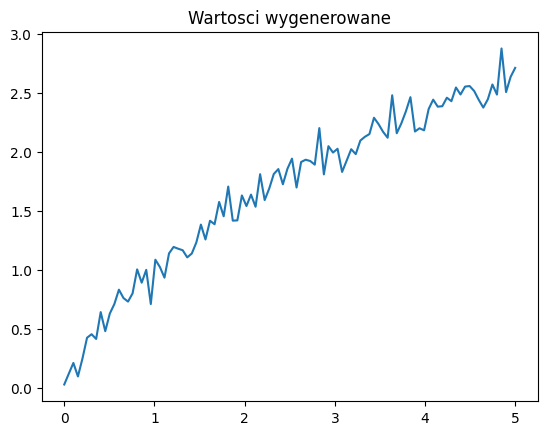

In [72]:
for xx, yy in zip(x,y):
    print(xx,yy)
plt.title("Wartosci wygenerowane")
plt.plot(x,y)
plt.show()


In [74]:
#Macierz układu normalnego X^T * X


X1 = np.hstack([np.ones((N, 1)), x])
X1T = X1.T

X2 = np.hstack([np.ones((N, 1)), x, x**2])
X2T = X2.T

X3 = np.hstack([np.ones((N, 1)), x, x**2, x**3])
X3T = X3.T


In [77]:
a_1 = np.linalg.inv(X1T @ X1) @ X1T @ y
a_2 = np.linalg.inv(X2T @ X2) @ X2T @ y
a_3 = np.linalg.inv(X3T @ X3) @ X3T @ y

print("Współczynniki wielomianu 1-go stopnia:", a_1)
print("Współczynniki wielomianu 2-go stopnia:", a_2)
print("Współczynniki wielomianu 3-go stopnia:", a_3)


Współczynniki wielomianu 1-go stopnia: [[0.48007963]
 [0.47448428]]
Współczynniki wielomianu 2-go stopnia: [[ 0.19268609]
 [ 0.82287564]
 [-0.06967827]]
Współczynniki wielomianu 3-go stopnia: [[ 0.09562447]
 [ 1.06184775]
 [-0.18976675]
 [ 0.0160118 ]]


In [80]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



def polynomial_predict(x, coeffs):
    degree = len(coeffs) - 1
    poly_features = PolynomialFeatures(degree)
    x_poly = poly_features.fit_transform(x)
    y_pred = x_poly @ coeffs
    return y_pred


y_pred_1 = polynomial_predict(x, a_1)
y_pred_2 = polynomial_predict(x, a_2)
y_pred_3 = polynomial_predict(x, a_3)


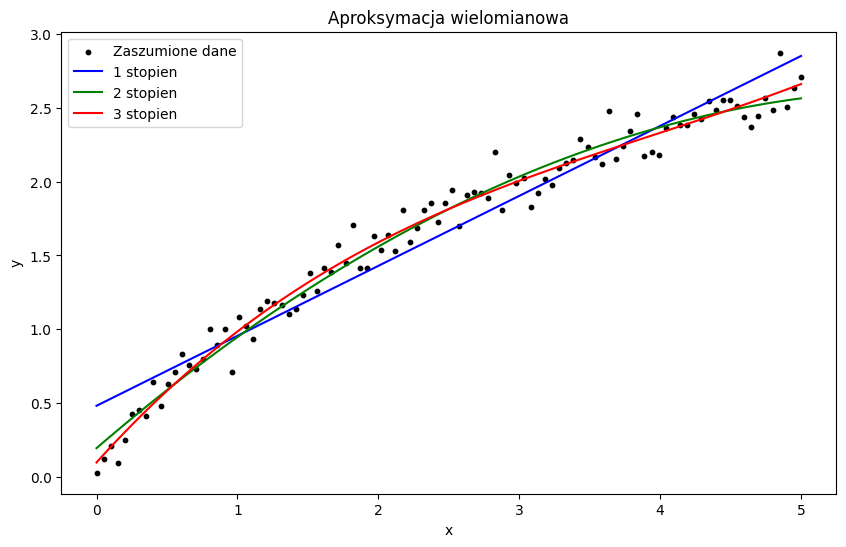

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='black', s=10, label='Zaszumione dane')
plt.plot(x, y_pred_1, color='blue', label='1 stopien')
plt.plot(x, y_pred_2, color='green', label='2 stopien')
plt.plot(x, y_pred_3, color='red', label='3 stopien')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproksymacja wielomianowa")
plt.legend()
plt.show()